# Monte Carlo By Examples

[Edward Lu](https://github.com/edwardlu71/notebooks)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import math
import random
from random import shuffle, choice
from datetime import datetime

from scipy.special import binom
from sympy import init_printing, Symbol, symbols, simplify, expand, Matrix, factor, factorial, diff, solve
from IPython.display import display, Math, Latex
from IPython.core.display import Image

random.seed(datetime.now())

## Calculate $\large \pi$

In [2]:
def calculate_pi(samples):
    in_circle = 0
    for _ in range(samples):
        x = random.random()
        y = random.random()
        if math.sqrt(x**2 + y**2) < 1:
            in_circle += 1
    pi = float(in_circle) / samples * 4
    print(f"estimated pi = {pi} from {samples} samples")    

In [3]:
samples = 1000000
calculate_pi(samples)

estimated pi = 3.1434 from 1000000 samples


## Calculate Integral $$ \int_{-1}^{1}e^{-x^2} = \sqrt{\pi} * Erf(1) $$

In [4]:
def distribution_func(x):
    return math.exp(-x**2)

In [5]:
def calculate_integral(samples):
    under_curve = 0
    for _ in range(samples):
        x = random.random()
        y = random.random()
        if y < distribution_func(x):
            under_curve += 1
    result = float(under_curve) / samples * 2
    print(f"estimated result = {result} from {samples} samples; accurate result = {math.erf(1) * math.sqrt(math.pi)}")    

In [6]:
samples = 100000
calculate_integral(samples)

estimated result = 1.49312 from 100000 samples; accurate result = 1.493648265624854


## Needle and Grid

A needle with length l is randomly dropped on a infinite grid of edge of d. Find the probability the needle crosses grid lines

In [7]:
def needle_crossing_gridlines(samples, l, d):
    crossed = 0
    crossed_hori = 0 
    crossed_vert = 0 
    crossed_2 = 0
    for _ in range(samples):
        x = random.random()*d/2
        y = random.random()*d/2
        a = random.random()*math.pi/2
        dy = l*math.sin(a)/2
        dx = l*math.cos(a)/2
        if (y < dy):
            crossed_hori += 1
        if (x < dx):
            crossed_vert += 1
        if (y < dy) and (x < dx):
            crossed_2 += 1
        if (y < dy) or (x < dx):
            crossed += 1
    print(f"probability of crossing vertical lines: {crossed_vert/samples}")
    print(f"probability of crossing horizontal lines: {crossed_hori/samples}")
    print(f"probability of all crossings: {crossed/samples}, theory: {l/d/math.pi*(4-l/d)}")
    print(f"probability of crossing both vertical and horizontal lines: {crossed_2/samples}, theory: {l/d/math.pi*(l/d)}")

In [8]:
needle_crossing_gridlines(1000000, 1, 3)

probability of crossing vertical lines: 0.212475
probability of crossing horizontal lines: 0.211928
probability of all crossings: 0.389396, theory: 0.3890454164468552
probability of crossing both vertical and horizontal lines: 0.035007, theory: 0.035367765131532294


### Analytic Result


$$ p = \frac{l}{\pi d}(4-\frac{l}{d})$$

<div>
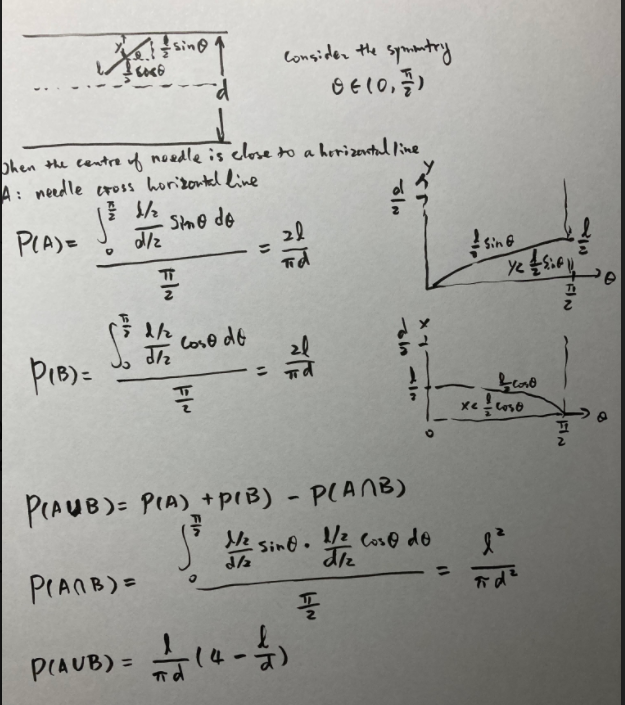
</div>

## Random Walks

In [9]:
def random_walk(steps):
    x, y = 0, 0
    for _ in range(steps):
        (dx, dy) = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
        x += dx
        y += dy
    return (x, y)    

In [10]:
def random_walk_histogram(samples, steps):
    distances = []
    for _ in range(samples):
        walk = random_walk(steps)
        distances.append(abs(walk[0]) + abs(walk[1]))
    fig, ax = plt.subplots(figsize=(20, 5))
    plt.hist(distances, bins=range(steps))
    plt.xlabel("Distance")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

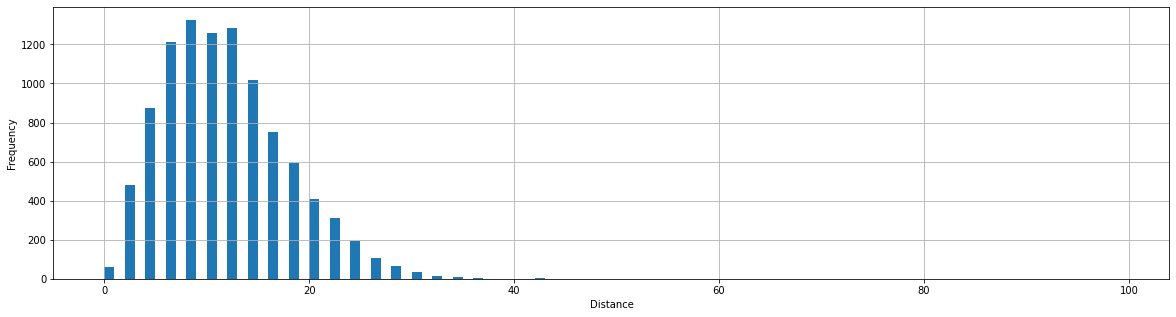

In [11]:
random_walk_histogram(10000, 100)

# Rabbit Catching

##### There are five rabbit holes in one line numbered from 1 to 5. A rabbit always sleeps in one of them and move to the next one on next day. If a farmer waits at hole #3, what's the expected days he can catch the rabbit.

In [12]:
number_of_holes = 5
waiting_at_hole = 3

def rabbit_walk():
    days = 1
    hole = random.randint(1, number_of_holes) # first day
    while hole != waiting_at_hole:
        if hole == 1:
            hole = 2
        elif hole == number_of_holes:
            hole = number_of_holes - 1
        else:
            hole += random.choice([-1, 1])
        days += 1
    return days

def rabbit_catch_histogram(samples):
    caught_on_day = []
    for _ in range(samples):
        caught_on_day.append(rabbit_walk())
    print(f"maximum simulation days {max(caught_on_day)}")
    print(f"average simulation days {sum(caught_on_day)/samples}")
    fig, ax = plt.subplots(figsize=(20, 4))
    plt.hist(caught_on_day, bins=max(caught_on_day), edgecolor='black', linewidth=1)
    plt.xlabel("days")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()      

maximum simulation days 43
average simulation days 3.796613


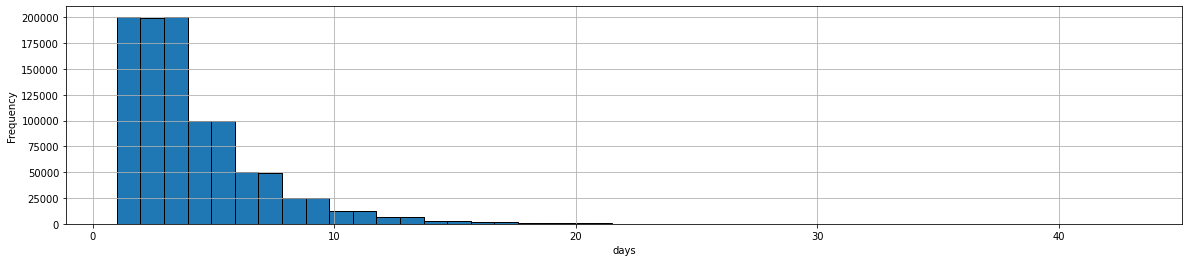

In [13]:
rabbit_catch_histogram(1000000)

##### Giving condition there are 2k+1 holes in one line, and the farmer waits at the hole #k+1. show the graph of the expected days vs k

In [14]:
def rabbit_walk_k(k):
    number_of_holes = 2 * k + 1
    waiting_at_hole = k + 1
    days = 1
    hole = random.randint(1, number_of_holes) # first day
    while hole != waiting_at_hole:
        if hole == 1:
            hole = 2
        elif hole == number_of_holes:
            hole = number_of_holes - 1
        else:
            hole += random.choice([-1, 1])
        days += 1
    return days

def rabbit_catch_k(samples, k):
    caught_on_day = []
    for _ in range(samples):
        caught_on_day.append(rabbit_walk_k(k))
    return sum(caught_on_day)/samples

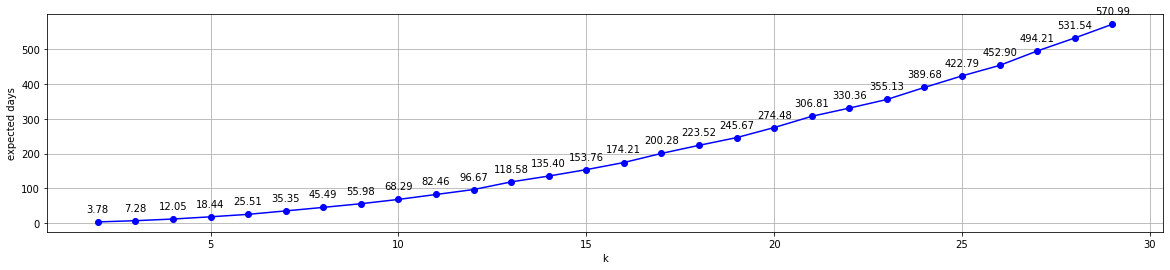

In [15]:
samples = 10000
ks = list(range(2, 30))
func_ks = []
for i in ks:
    func_ks.append(rabbit_catch_k(samples, i))
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(ks, func_ks, 'bo-')
for x, y in zip(ks, func_ks):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center    
plt.xlabel("k")
plt.ylabel("expected days")
plt.grid(True)
plt.show()

In [16]:
def rabbit_catch_histogram_k(samples, k):
    caught_on_day = []
    for _ in range(samples):
        caught_on_day.append(rabbit_walk_k(k))
    print(f"maximum simulation days {max(caught_on_day)}")
    print(f"average simulation days {sum(caught_on_day)/samples}")
    fig, ax = plt.subplots(figsize=(20, 4))
    plt.hist(caught_on_day, bins=min(max(caught_on_day),50), edgecolor='black', linewidth=1)
    plt.xlabel("days")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()      

maximum simulation days 78
average simulation days 7.27364


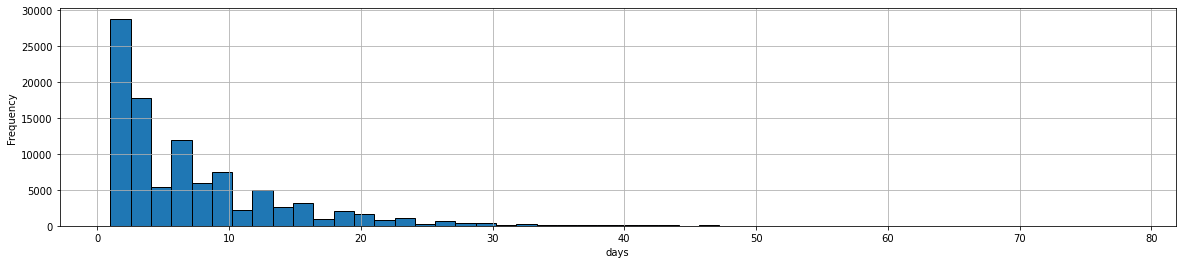

In [17]:
rabbit_catch_histogram_k(100000, 3)

### Analytic Solution for Rabbit Catching Problem

Assume there are 2k+1 holes, and the farmer is waiting at hole #k+1. The analytic formula for the expected number of days vs k is:
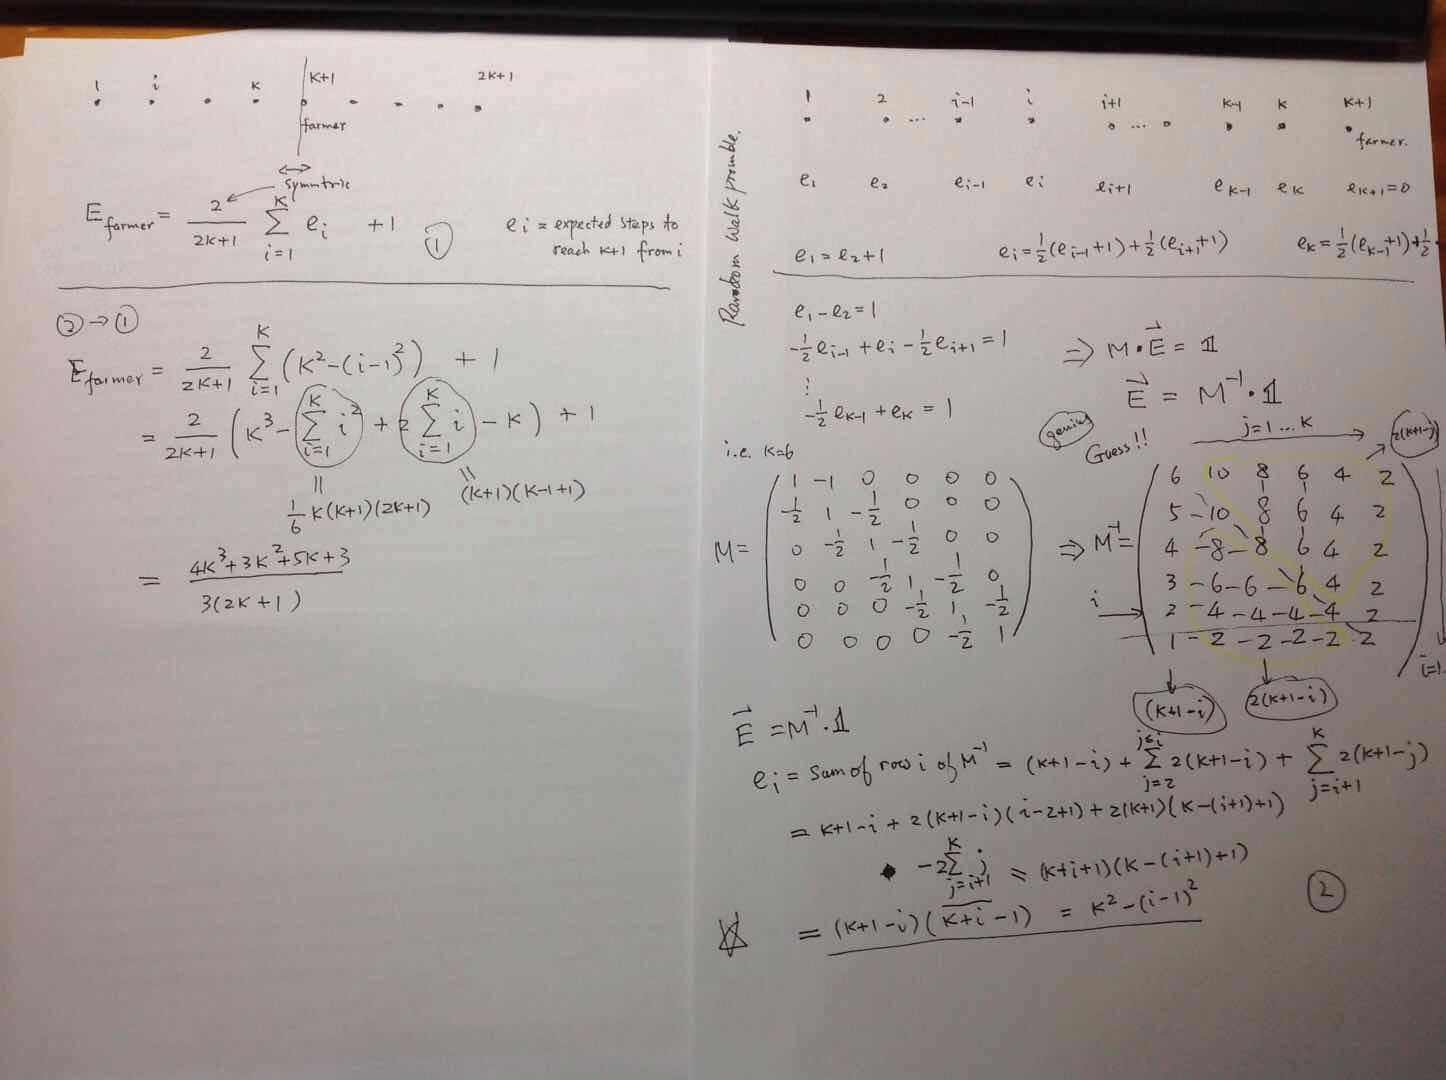

In [18]:
k = symbols('k')
f = k*(4*k-1)*(k+1)/3/(2*k+1) + 1
simplify(expand(f))

(4*k**3 + 3*k**2 + 5*k + 3)/(3*(2*k + 1))

In [19]:
e2 = f.subs(k,2) # 5 holes
e3 = f.subs(k,3) # 7 holes
display(e2, e2.p/e2.q, e3, e3.p/e3.q)

19/5

3.8

51/7

7.285714285714286

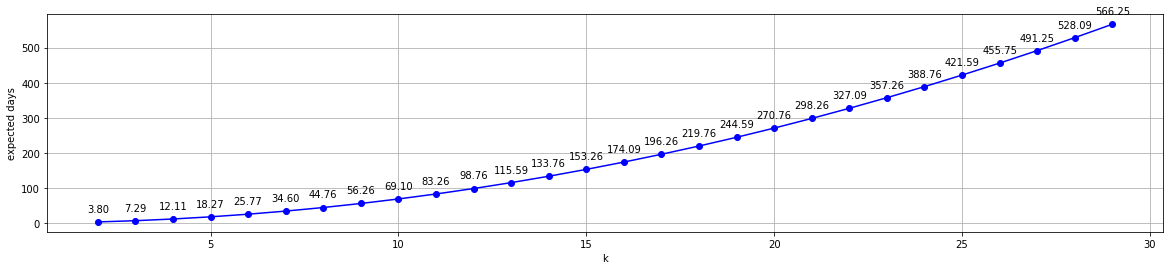

In [20]:
ks1 = list(range(2, 30))
func_ks1 = []
for i in ks1:
    e = f.subs(k, i)
    func_ks1.append(e.p/e.q)
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(ks1, func_ks1, 'bo-')
for x, y in zip(ks1, func_ks1):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center    
plt.xlabel("k")
plt.ylabel("expected days")
plt.grid(True)
plt.show()

# Baker's Problem
##### A small town has 6 residents with a baker. The baker makes \\$1 profit to sell a cake but it costs the baker \\$0.4 if a cake is not sold on the day. If each resident buy maximum one cake from the baker everyday, how many cakes should the baker make for the maximum profits?

*I am going to sell this formula and codes to the restaurant in Eastwood for a free lunch :)*

##### Monte Carlo method not very good for this problem

In [21]:
cost = 0.4
price = 1.4

def calculate_profilt(residents, samples):
    n  = residents - 1 # maximum customers
    pc = np.zeros(residents)
    for _ in range(samples):
        made_cakes = random.randint(0,n)
        custumers_number = random.randint(0,n)
        if made_cakes > custumers_number:
            pc[made_cakes] += price * custumers_number - cost * made_cakes
        else:
            pc[made_cakes] += (price - cost) * made_cakes
    return np.argsort(pc)[-1]

In [22]:
calculate_profilt(6, 100000)

4

#### Exhaustive Algorithm

profits vs cakes [ 0.   4.6  7.8  9.6 10.   9. ]
the baker can make 4 cakes each day for the expected maximum profit


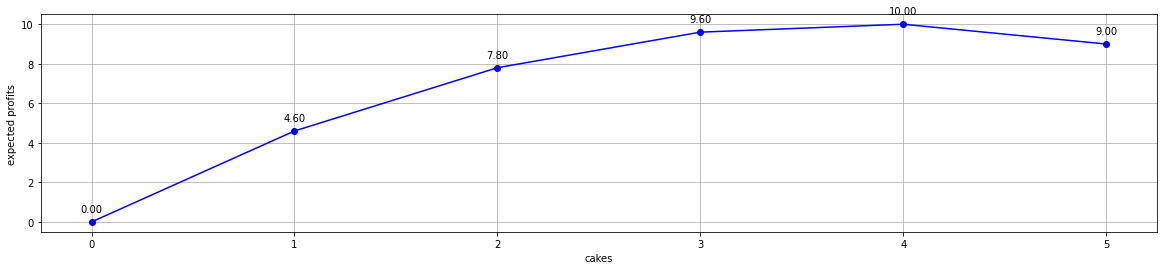

In [23]:
residents = 6    # residents number
cost = 0.4
price = 1.4

n  = residents - 1 # maximum customers
p = np.zeros((residents,residents))
for customer in range(residents):
    for cake in range(residents):
        if cake > customer:
            p[customer][cake] = price * customer - cost * cake
        else:
            p[customer][cake] = (price - cost) * cake

profits_cakes = p.sum(axis=0)
print(f"profits vs cakes {profits_cakes}")
print(f"the baker can make {np.argsort(profits_cakes)[-1]} cakes each day for the expected maximum profit")

xs = list(range(residents))
fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(xs, profits_cakes, 'bo-')
for x, y in zip(xs, profits_cakes):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center    
plt.xlabel("cakes")
plt.ylabel("expected profits")
plt.grid(True)
plt.show()

#### Analytic Solution

$$ profit(cakes) = \sum_{customers=0}^{N} \left\{
\begin{array}{ll}
      price * customers - cost * cakes & cakes \gt customers \\
      (price - cost) * cakes & cakes \leq customers \\
\end{array} 
\right.  $$
$$ profit(cakes) = \sum_{customers=0}^{cakes} (price * customers - cost * cakes) + \sum_{customers=cakes+1}^{N} (price - cost) * cakes$$

$$ \frac{D_{profit}}{D_{cakes}} = 0 $$

cakes*(5.3 - 0.7*cakes)

5.3 - 1.4*cakes

maximum point at: cakes = 3.78571428571429, profit for 3 cakes = 9.60000000000000, for 4 cakes = 10.0000000000000


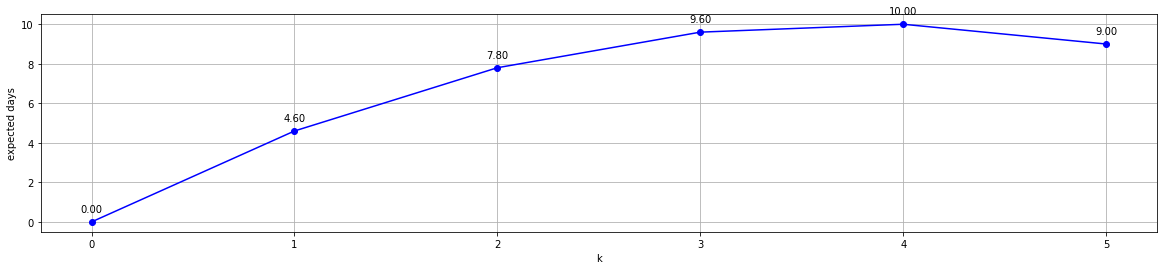

In [24]:
residents = 6    # residents number
cost = 0.4
price = 1.4

cakes = symbols('cakes')
p = 0.3*(cakes+1)*cakes + (residents-1-cakes)*cakes
display(simplify(p))
display(diff(p))

v = solve(diff(p))
print(f"maximum point at: cakes = {v[0]}, profit for {v[0].floor()} cakes = {p.subs(cakes,v[0].floor())}, for {v[0].ceiling()} cakes = {p.subs(cakes,v[0].ceiling())}")

xs = list(range(residents))
ys = [float(p.subs(cakes, i)) for i in xs]

fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(xs, ys, 'bo-')
for x, y in zip(xs, ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center    
plt.xlabel("k")
plt.ylabel("expected days")
plt.grid(True)
plt.show()

# Alien's Problem
##### An alien lands on earth. Every day after that, each alien on earth undergoing transformation, which could be any of the four equally events: a) the alien dies b) the alien does nothing c) the alien replicate itself to 2 in total d) the alien replicates itself to 3 in total. What's the probability alien race die out and goes extinct?

*I am going to sell this codes and formula to Elon Musk! He needs it on Mars :))

In [25]:
threshold = 100 # assume the population above this threshold number will never go extinct

def extinct(samples):
    extincted = 0
    for _ in range(samples):
        population = 1
        while population > 0 and population < threshold:
            s = 0
            for _ in range(1, population+1):
                s += random.choice([0, 1, 2, 3])
            population = s
        if population == 0:
            extincted += 1
    return extincted/samples

In [26]:
extinct(100000)

0.41341

### Analytic Solution
$$ \frac{1}{4}(1+p+p^{2}+p^{3}) = p $$

In [27]:
p = symbols('p')
f = p**3+p**2-3*p+1
display(factor(f))
R = solve(f)
display(R, R[1].round(3))

(p - 1)*(p**2 + 2*p - 1)

[1, -1 + sqrt(2), -sqrt(2) - 1]

0.414

# Passengers Problem
N passengers each with a ticket for a seat on a bus. Find out how many different ways everybody is not sitting on his/her own seat.

In [28]:
import numpy as np

def percentage_nobody_in_right_seat(seats, samples):
    tickets = list(range(seats))
    count = 0
    for _ in range(samples):
        if not any([x==y for x, y in zip(np.random.permutation(tickets).tolist(), tickets)]):
            count += 1
    return count/samples

In [29]:
percentage_nobody_in_right_seat(100,100000)

0.36961

### Analytic Solution
consider passenger pi sits into seat \#1, and if passenger p1 is sitting in seat \#i then it equals to (n-2) size of same problem; if passenger p1 is not in seat \#i we then assume passenger p1 is a new pi in the (n-1) size of the same problem. Thus we have recurrence relation
$$ P_{n} = (n-1)(P_{n-1}+P_{n-2}) $$
Assume the exclusive permutaion $P_{n}$ is a fraction of n!, say $P_{n} = \large t_{n}n!$ where $ t_{n} \leqslant 1$
$$ \large t_{n} - t_{n-1} = \frac{(-1)^{n}}{n!} $$

$$ P_{n} = \large n! \sum_{k=0}^{n} \frac{(-1)^{k}}{k!} $$

From Taylor expansion of $e^{x}$ we have
$$  e^{x} = \sum_{n=0}^{\infty } \large \frac{x^{n}}{n!} $$
When $ n \geqslant 5 $, this formula is accurate enough
$$  P_{n} \mid _{n \to \infty} = \large \frac{n!}{e} $$
$$  \% = \frac{1}{e} $$

In [30]:
def P(n):
    s = 0
    for k in range(n+1):
        s += (-1)**k/math.factorial(k)
    return int(math.factorial(n)*s)       

2 1 	 0.5 	 0.49893
3 2 	 0.3333333333333333 	 0.33188
4 9 	 0.375 	 0.37437
5 44 	 0.36666666666666664 	 0.37103
6 265 	 0.3680555555555556 	 0.3663
7 1854 	 0.3678571428571429 	 0.36749
8 14833 	 0.36788194444444444 	 0.36753
9 133496 	 0.36787918871252206 	 0.36895
10 1334961 	 0.3678794642857143 	 0.37119
11 14684570 	 0.3678794392336059 	 0.36853
12 176214841 	 0.3678794413212816 	 0.36852
13 2290792932 	 0.36787944116069116 	 0.3678
14 32071101049 	 0.3678794411721619 	 0.36708
15 481066515734 	 0.3678794411713972 	 0.36625
16 7697064251745 	 0.367879441171445 	 0.37072
17 130850092279664 	 0.36787944117144217 	 0.36919
18 2355301661033953 	 0.36787944117144233 	 0.36419
19 44750731559645120 	 0.36787944117144245 	 0.36871


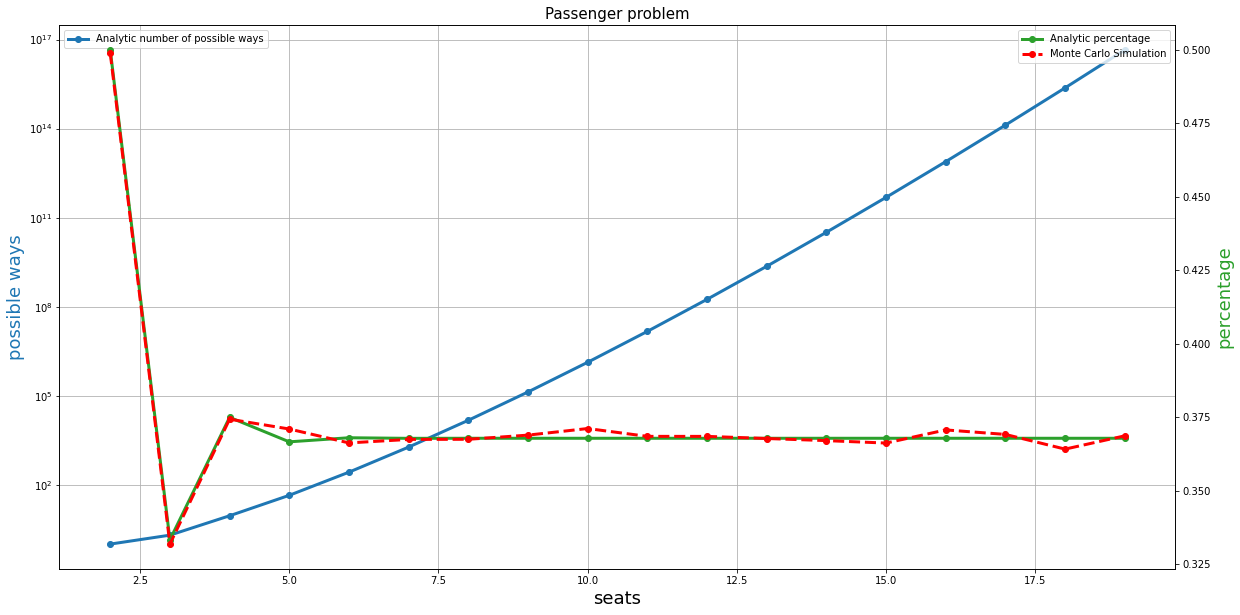

In [31]:
samples = 100000
max_seats = 20
ns = list(range(2, max_seats))
ps = list()
es = list()
mcs = list()

for i in ns:
    pv = P(i)
    mc_value = percentage_nobody_in_right_seat(i, samples)
    mcs.append(mc_value)
    ps.append(pv)
    e = pv/math.factorial(i)
    es.append(e)
    print(i, pv, '\t', e, '\t', mc_value)
    
# plot
fig, ax = plt.subplots(figsize=(20, 10))
color = 'tab:blue'
ax.set_yscale('log')
ax.plot(ns, ps,  'o-', color=color, label='Analytic number of possible ways', lw=3)
ax.set_ylabel('possible ways', color=color, fontsize=18)
ax.set_xlabel('seats', color='black', fontsize=18)
ax.xaxis.grid()
ax.yaxis.grid()
ax.legend(loc='upper left')
color = 'tab:green'
ax2 = ax.twinx()
ax2.plot(ns, es,  'o-', color=color, label='Analytic percentage', lw=3)
ax2.plot(ns, mcs,  'ro--', label='Monte Carlo Simulation', lw=3)
ax2.set_ylabel('percentage', color=color, fontsize=18)
ax2.legend(loc='upper right')
plt.title("Passenger problem",fontsize=15)
plt.show()    

#### Exhaustive Verification of the formula

In [32]:
import itertools
def exclusive_permutation(n):
    permut = list(itertools.permutations(set(range(n)), n))
    excluded_permut = list()
    for e in permut:
        for i in range(n):
            if i == e[i]:
                break
        else:
            excluded_permut.append(e)
    return (n, len(excluded_permut), math.factorial(n), math.factorial(n)/len(excluded_permut))

In [33]:
for i in range(2,10):
    print(exclusive_permutation(i))

(2, 1, 2, 2.0)
(3, 2, 6, 3.0)
(4, 9, 24, 2.6666666666666665)
(5, 44, 120, 2.727272727272727)
(6, 265, 720, 2.7169811320754715)
(7, 1854, 5040, 2.7184466019417477)
(8, 14833, 40320, 2.7182633317602645)
(9, 133496, 362880, 2.71828369389345)


# Extended Passengers Problem

N passengers each with a ticket for a seat on a bus. Find out how many different ways everybody with the tickets of the first L seats is not sitting on his/her own seat

I give the analytic solution directly here - not an easy one.

$$ \large P_{l,n} = n! - (n-l)! - \sum_{i=1}^{l-1} \binom{l}{i}P_{i,n-l+i} $$

In [34]:
def P(l,k):
    r = factorial(k) - factorial(k-l)
    for i in range(1,l):
        if i > 1:
            r -= int(binom(l,i)) * P(i,k-l+i)
        else:
            r -= int(binom(l,i)) * (k-l+i-1) * factorial(k-l+i-1)
    return r

In [35]:
n = Symbol('n', integer=True)
permutation = dict()
percentage = dict()
for i in range(1,11):
    permutation[i] = simplify(expand(P(i,n))); #display(i, permutation[i])
    percentage[i] = simplify(expand(P(i,n)/factorial(n))); display(i, percentage[i])

1

(n - 1)/n

2

(n**2 - 3*n + 3)/(n*(n - 1))

3

(n**3 - 6*n**2 + 14*n - 13)/(n*(n - 2)*(n - 1))

4

(n**4 - 10*n**3 + 41*n**2 - 84*n + 73)/(n*(n - 3)*(n - 2)*(n - 1))

5

(n**5 - 15*n**4 + 95*n**3 - 325*n**2 + 609*n - 501)/(n*(n - 4)*(n - 3)*(n - 2)*(n - 1))

6

(n**6 - 21*n**5 + 190*n**4 - 965*n**3 + 2944*n**2 - 5155*n + 4051)/(n*(n - 5)*(n - 4)*(n - 3)*(n - 2)*(n - 1))

7

(n**7 - 28*n**6 + 343*n**5 - 2415*n**4 + 10689*n**3 - 30023*n**2 + 49790*n - 37633)/(n*(n - 6)*(n - 5)*(n - 4)*(n - 3)*(n - 2)*(n - 1))

8

(n**8 - 36*n**7 + 574*n**6 - 5348*n**5 + 32179*n**4 - 129220*n**3 + 340402*n**2 - 539616*n + 394353)/(n*(n - 7)*(n - 6)*(n - 5)*(n - 4)*(n - 3)*(n - 2)*(n - 1))

9

(n**9 - 45*n**8 + 906*n**7 - 10794*n**6 + 84567*n**5 - 455511*n**4 + 1698374*n**3 - 4246842*n**2 + 6478521*n - 4596553)/(n*(n - 8)*(n - 7)*(n - 6)*(n - 5)*(n - 4)*(n - 3)*(n - 2)*(n - 1))

10

(n**10 - 55*n**9 + 1365*n**8 - 20250*n**7 + 200193*n**6 - 1387617*n**5 + 6873215*n**4 - 24148490*n**3 + 57803031*n**2 - 85286923*n + 58941091)/(n*(n - 9)*(n - 8)*(n - 7)*(n - 6)*(n - 5)*(n - 4)*(n - 3)*(n - 2)*(n - 1))

### Formula p[5] solve the equivalent problem: 
how many different ways the digits 0-9 can be rearranged so that none of the even numbers is in its original position

In [36]:
display(permutation[5].subs(n,10))
x = percentage[5].subs(n,10)
x, x.p/x.q

2170680

(18089/30240, 0.598181216931217)

#### Monte Carlo Varification

In [37]:
def percentage_nobody_with_even_ticket_number_in_right_seat(seats, samples):
    tickets = list(range(seats))
    count = 0
    for _ in range(samples):
        if not any([x==y and x%2==0 for x, y in zip(np.random.permutation(tickets).tolist(), tickets)]):
            count += 1
    return count/samples

In [38]:
print(percentage_nobody_with_even_ticket_number_in_right_seat(10,100000))

0.5996


#### Natural Number

The result varified from below test indicating that the probability of this problem is related with nature number in this way

$$  probability = \large \frac{1}{e^{\frac{L}{N}}} $$

In [39]:
for ratio in range(1,5):
    print(f"\nratio of L and N: 1:{ratio}: ")
    for i in range(1,11):
        f = percentage[i]
        y = f.subs(n,i*ratio)
        v = y.p/y.q
        print(v, "\t", v - 1/math.exp(1/ratio)) 


ratio of L and N: 1:1: 
0.0 	 -0.36787944117144233
0.5 	 0.13212055882855767
0.3333333333333333 	 -0.03454610783810902
0.375 	 0.007120558828557666
0.36666666666666664 	 -0.0012127745047756933
0.3680555555555556 	 0.0001761143841132462
0.3678571428571429 	 -2.2298314299451505e-05
0.36788194444444444 	 2.503273002107953e-06
0.36787918871252206 	 -2.524589202690386e-07
0.3678794642857143 	 2.3114271940904985e-08

ratio of L and N: 1:2: 
0.5 	 -0.10653065971263342
0.5833333333333334 	 -0.023197326379300054
0.5916666666666667 	 -0.01486399304596675
0.5958333333333333 	 -0.010697326379300098
0.598181216931217 	 -0.008349442781416472
0.5996858465608466 	 -0.006844813151786866
0.6007316179191179 	 -0.005799041793515536
0.6015004459275293 	 -0.005030213785104154
0.6020893984941166 	 -0.004441261218516845
0.6025549561148036 	 -0.003975703597829838

ratio of L and N: 1:3: 
0.6666666666666666 	 -0.04986464390712264
0.7 	 -0.016531310573789315
0.7063492063492064 	 -0.010182104224582877
0.70917508

# General Monty Hall Problem
Original problem: Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

The Monte Carlo machine built below reflects exact game rule without any mathematic assumption, and it is generic to any combination of cars and donkeys giving condition more than 1 donkey are in the list.

In [40]:
bags = [["car", "donkey", "donkey"], 
        ["car", "donkey", "donkey", "donkey"], 
        ["car", "donkey", "donkey", "donkey", "donkey"], 
        ["car", "car", "donkey", "donkey"], 
        ["car", "car", "donkey", "donkey", "donkey"]] 

random.seed(datetime.now())

for bag in bags:
    samples = 1000000
    score_first_choice = 0
    score_second_choice = 0
    for _ in range(samples):
        shuffle(bag)
        car_donkey_list = dict(enumerate(bag))
        # guest pick the first choice
        guest = choice(range(len(bag)))
        if car_donkey_list[guest] == "car":
            score_first_choice += 1
        # remove the guest picked item behind its door
        car_donkey_list.pop(guest)
        # host's choice space
        host_list = {k: car_donkey_list[k] for k in car_donkey_list.keys() if car_donkey_list[k] != "car"}
        # host pick a donkey, and remove it
        host = choice(list(host_list.keys()))
        car_donkey_list.pop(host)
        # guest re-choose an item from the remaining doors
        guest2 = choice(list(car_donkey_list.keys()))
        if car_donkey_list[guest2] == "car":
            score_second_choice += 1
    print(f"with combination of {bag}")
    print(f"the probability of the first choice and second choice to win a car are {score_first_choice/samples}, {score_second_choice/samples}")   

with combination of ['car', 'donkey', 'donkey']
the probability of the first choice and second choice to win a car are 0.334513, 0.665487
with combination of ['car', 'donkey', 'donkey', 'donkey']
the probability of the first choice and second choice to win a car are 0.250684, 0.374067
with combination of ['donkey', 'donkey', 'donkey', 'donkey', 'car']
the probability of the first choice and second choice to win a car are 0.199505, 0.266751
with combination of ['donkey', 'car', 'donkey', 'car']
the probability of the first choice and second choice to win a car are 0.499816, 0.750204
with combination of ['donkey', 'donkey', 'car', 'donkey', 'car']
the probability of the first choice and second choice to win a car are 0.399991, 0.534038


### Analytic Solution

I saw some articles about the Bayesian analysis on this problem, which appeared having wrong results if extending the solution to arbitary numbers of cars and donkeys. If you know a good Bayesian analysis, do let me know. 

Below is my simple analysis matching well with Monte Carlo simulations. You can see that the second choice is always better than the first choice, which makes sense that the sample size of second choice is smaller with less donkeys.

- c: cars number
- d: donkeys number (>1)
- n: c+d

In [41]:
n, c, d = symbols('n, c d')
p_first_choice = c/(c+d)
p_second_choice = c/(c+d)*(c-1)/(c-1+d-1) + d/(c+d)*c/(c+(d-2))
display(p_first_choice, p_second_choice)

c/(c + d)

c*d/((c + d)*(c + d - 2)) + c*(c - 1)/((c + d)*(c + d - 2))

In [42]:
display(p_first_choice.subs(d, n-c).expand().simplify(), p_second_choice.subs(d, n-c).expand().simplify())
display(p_first_choice.simplify(), p_second_choice.simplify())

c/n

c*(n - 1)/(n*(n - 2))

c/(c + d)

c*(c + d - 1)/((c + d)*(c + d - 2))

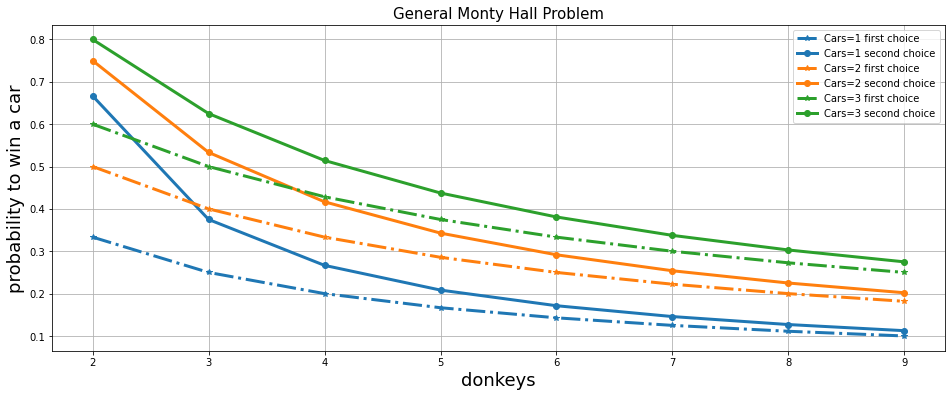

In [43]:
# plot
C = np.arange(1, 4, 1)
D = np.arange(2, 10, 1)
DM, CM = np.meshgrid(D, C)
P1 = CM/(CM+DM)
P2 = CM/(CM+DM)*(CM+DM-1)/(CM+DM-2)

fig, ax = plt.subplots(figsize=(16, 6))
colors = list(mcolors.TABLEAU_COLORS)
n_colors = len(colors)
for i in C:
    ax.plot(D, P1[i-1],  '*-.', color=colors[(i-1)%n_colors], label=f"Cars={i} first choice", lw=3)
    ax.plot(D, P2[i-1],  'o-', color=colors[(i-1)%n_colors], label=f"Cars={i} second choice", lw=3)
ax.set_ylabel('probability to win a car', color='black', fontsize=18)
ax.set_xlabel('donkeys', color='black', fontsize=18)
ax.legend(loc='upper right')
plt.grid()
plt.title("General Monty Hall Problem",fontsize=15)
plt.show()    

## Dice Problem

Find the probability of all the faces appeared after n times rolling of a die

In [44]:
def dice_roller(faces=6):
    return random.choice(range(1,faces+1))

def dice_roller_n(n=1, faces=6):
    dices = []
    for i in range(n):
        dices.append(random.choice(range(1,faces+1)))
    return dices    

In [45]:
def probability_all_faces_appeared(samples, n=6):
    count = 0
    for _ in range(samples):
        a = dice_roller_n(n)
        if len(set(a))==6:
            count += 1
    return count/samples

In [46]:
probability_all_faces_appeared(10000,10)

0.27

#### Analytic Solution

In [47]:
import scipy.special
def probability_all_faces_appeared_analytic(n=6, faces=6):
    # s is the number of cases i.e. it has 1 but don't have 2
    s = 0
    for i in range(1,n):
        s += scipy.special.binom(faces, i) * (faces-i)**n * (-1)**i
    return 1.0+s/faces**n

In [48]:
x = np.linspace(6,50,45)
y = [probability_all_faces_appeared_analytic(int(i)) for i in x]
ym = [probability_all_faces_appeared(1000, int(i)) for i in x]

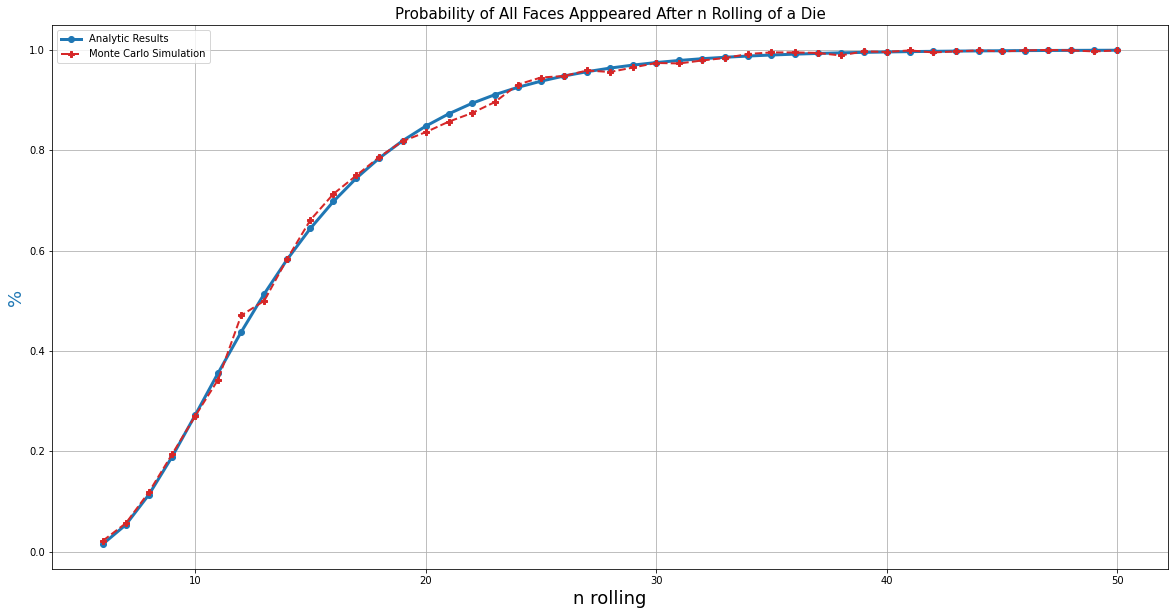

In [49]:
# plot
fig, ax = plt.subplots(figsize=(20, 10))
color = 'tab:blue'
ax.plot(x, y,  'o-', color=color, label='Analytic Results', lw=3)
ax.set_ylabel('%', color=color, fontsize=18)
ax.set_xlabel('n rolling', color='black', fontsize=18)
ax.xaxis.grid()
ax.yaxis.grid()
ax.legend(loc='upper left')
color = 'tab:red'
ax.plot(x, ym,  'P--', color=color, label='Monte Carlo Simulation', lw=2)
plt.legend(loc='upper left')
plt.title("Probability of All Faces Apppeared After n Rolling of a Die",fontsize=15)
plt.show()    